In [44]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [22]:
len(words)

32033

In [23]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [24]:
block_size = 3
X,Y = [],[]
for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context),'------>',itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ------> e
..e ------> m
.em ------> m
emm ------> a
mma ------> .
olivia
... ------> o
..o ------> l
.ol ------> i
oli ------> v
liv ------> i
ivi ------> a
via ------> .
ava
... ------> a
..a ------> v
.av ------> a
ava ------> .
isabella
... ------> i
..i ------> s
.is ------> a
isa ------> b
sab ------> e
abe ------> l
bel ------> l
ell ------> a
lla ------> .
sophia
... ------> s
..s ------> o
.so ------> p
sop ------> h
oph ------> i
phi ------> a
hia ------> .


In [65]:
# build dataset
def build_dataset(words):
    block_size = 3
    X,Y = [],[]
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context),'------>',itos[ix])
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape,Y.shape)
    return X,Y
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte,Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [26]:
C = torch.randn((27,2))

In [27]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [28]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [29]:
emb.view(32,6)  # equals to torch.cat(torch.unbind(emb,dim=1),dim=1)

tensor([[ 1.2296, -0.2477,  1.2296, -0.2477,  1.2296, -0.2477],
        [ 1.2296, -0.2477,  1.2296, -0.2477, -1.1373,  0.4754],
        [ 1.2296, -0.2477, -1.1373,  0.4754, -0.2205,  1.3389],
        [-1.1373,  0.4754, -0.2205,  1.3389, -0.2205,  1.3389],
        [-0.2205,  1.3389, -0.2205,  1.3389,  1.4346, -1.3888],
        [ 1.2296, -0.2477,  1.2296, -0.2477,  1.2296, -0.2477],
        [ 1.2296, -0.2477,  1.2296, -0.2477, -0.6111, -0.4484],
        [ 1.2296, -0.2477, -0.6111, -0.4484, -1.2807,  1.9624],
        [-0.6111, -0.4484, -1.2807,  1.9624,  1.3824,  1.1076],
        [-1.2807,  1.9624,  1.3824,  1.1076, -0.3287, -0.1810],
        [ 1.3824,  1.1076, -0.3287, -0.1810,  1.3824,  1.1076],
        [-0.3287, -0.1810,  1.3824,  1.1076,  1.4346, -1.3888],
        [ 1.2296, -0.2477,  1.2296, -0.2477,  1.2296, -0.2477],
        [ 1.2296, -0.2477,  1.2296, -0.2477,  1.4346, -1.3888],
        [ 1.2296, -0.2477,  1.4346, -1.3888, -0.3287, -0.1810],
        [ 1.4346, -1.3888, -0.3287, -0.1

In [30]:
h = torch.tanh(emb.view(-1,6) @ W1 +  b1)

In [31]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [32]:
logits = h @ W2 + b2

In [33]:
counts = logits.exp()

In [34]:
prob = counts / counts.sum(1,keepdim=True)

In [35]:
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(17.6122)

In [36]:
# ---------now made respectable :) ----------

In [66]:
Xtr.shape,Ytr.shape #dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [111]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10),generator=g)
W1 = torch.randn((30,200),generator=g)
b1 = torch.randn(200,generator=g)
W2 = torch.randn((200,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

In [112]:
sum(p.nelement() for p in parameters)

11897

In [113]:
for p in parameters:
    p.requires_grad = True

In [114]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [115]:
lri = []
lossi = []
stepi = []

In [116]:

for i in range(1000):
    #minibatch construct
    ix = torch.randint(0,Xtr.shape[0],(32,))
    emb = C[Xtr][ix]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1,keepdim=True)
    # loss = -prob[torch.arange(32),Y].log().mean()
    loss = F.cross_entropy(logits,Ytr[ix])
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update 
    #lr = lrs[i]
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    # track stats
    # lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)

In [104]:
print(loss.item())

2.603032112121582


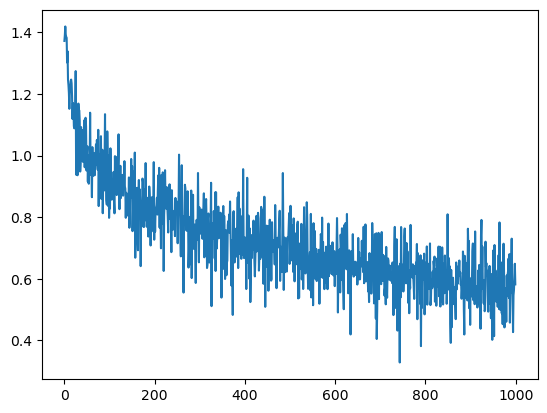

In [117]:
plt.plot(stepi,lossi)
plt.show()

In [118]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(3.7633, grad_fn=<NllLossBackward0>)

In [ ]:
#testing split,dev/validation data,test split
# 80%,10%,10%

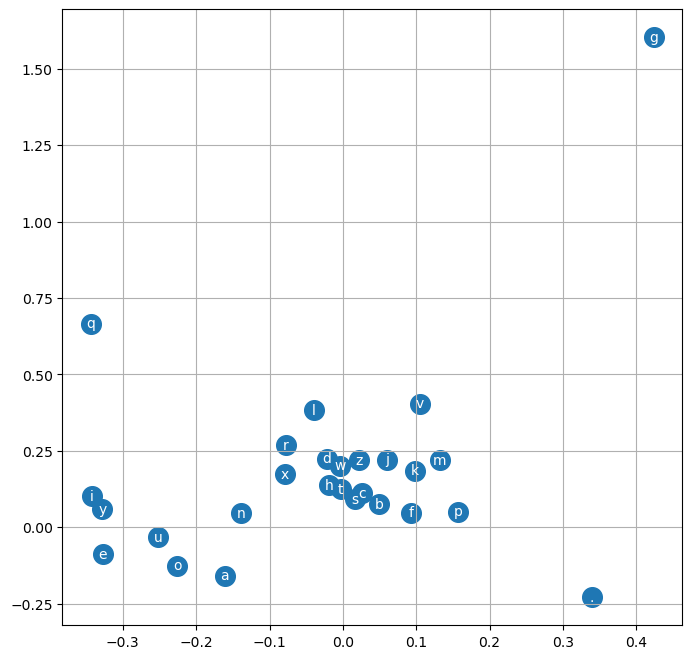

In [110]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha="center",va="center",color='white')
plt.grid('minor')
plt.show()